# WATERSHED SEGMENTATION

WatershedSegmentation file with all the created functions is imported: 

In [1]:
from WatershedSegmentation import *

## Introduction

The **watershed algorithm** is a **morphology region-based segmentation technique** that allows you to find regions of an image using its morphology. It is widely used for segmentation and processing of medical images.


This **algorithm assumes** that the **intensity of each pixel corresponds to its height** above the relief. In this way, **objects in the image** are represented **as valleys** where:
- **Edge or maximum of objects** are the **upper elevations**.
- **Interior or minimum of objects** are the **bottom of the valley**.

This **algorithm segments** comparing the image with the **flooding of a topographical relief**. It takes as reference a **local minimum** point and its contigous ares with intermediate levels of gray, these points are going to be **'covered by water'** while **local maximums act as levees**. Between these two regions a dividing boundary is generated. The **result of the algorithm** are these **two differented** parts, the **segmented elements**.

**Watershed** analysis has proven to be a **powerful tool** for many **2D image-segmentation** applications. Besides, Higgins and Ojard applied a **3D extension** of the watershed algorithm to **cardiac volumetric images**.

The **main problem** with this algorithm is the **over-segmentation due to noise** (which generates a greater number of local minima). There are different methods to **solve this problem**: 

- Union of neighboring regions that share a certain criterion (methodology similar to split and merge). 
- Applying a smoothing filter prior to applying the algorithm to reduce noise. 
- Define the regions that will be generated by establishing a series of seeds from where the process will start.


During the **notebook**, it is going to be concluded **if a previous smooth filter is useful** in our images and also **if it is better to establish a series of seeds to select local minima** and that local minima do not be generated randomly in all the image.

In this part of the project, a **image of pneumonia (COVID-19 patient)** has been selected from our database. Due to the problems that sometimes appear working with too high resolution images, the project is going to evaluate same **image segmentation but with different resolution images**. 

(Text(0.5, 1.0, 'Original image (low resolution)'), (-0.5, 59.5, 50.5, -0.5))

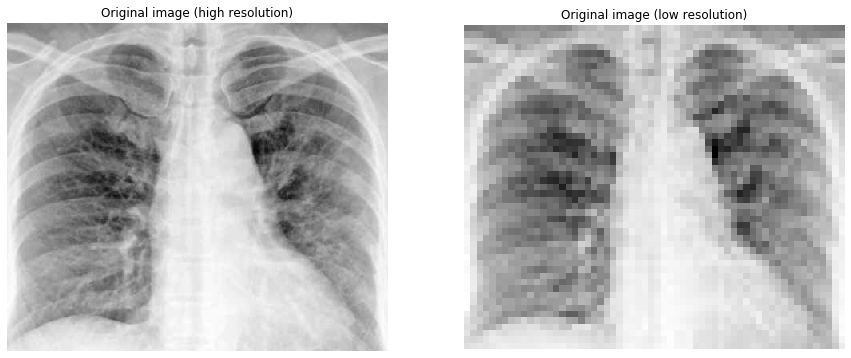

In [7]:
plt.figure(figsize=(15,7))


plt.subplot(1,2,1)
image_high = mpimg.imread('pneumonia.jpg') 
image_high = rgb2gray(image_high)
plt.imshow(image_high, cmap ="gray")
plt.title("Original image (high resolution)"), plt.axis('off')



plt.subplot(1,2,2)
image_low= mpimg.imread('small_pneumonia.jpg') 
image_low= rgb2gray(image_low)
plt.imshow(image_low, cmap ="gray")
plt.title("Original image (low resolution)"), plt.axis('off')

**Results**

Due to the reduction of resolution, our **image has** included some **random noise**. As explained previously, noise images can produce **over-segmentation**. If this is produced, algorithm would not be useful to segment images. For that reason, it is important to apply a smooth filter in order to reduce noise of image, and in that way, reduce the over-segmentation and get a best result. Then, it is going to be seen if this procedure is useful in our image.

### Perona-Malik filter

Perona-Malik filter is an **anisotropic diffusion filter** (smooth filter). It applies adaptive smoothing techniques in order to **reduce noise but without removing significant information such as edges, lines or details**. 

The application/functioning of anisotropic filters depends on local properties of the image. It applies an inhomogeneous process that module the diffusivity depending on gradient of objects. In this way, areas with a **high gradient** such as edges will have a **smaller diffusion/smoothing** while areas with a **low gradient** such as interior parts will have a **greater diffusion** and therefore, a **greater smoothing**.

In our previous low resolution image, smooth filter has to be applied to reduce image noise in low gradient regions. Posteriorly, a comparation between non-smooth image segmentation and smooth image segmentation is going to be done. This will determine if the application of smooth filter is necessary in our case or if the algoritm created is robust to noise.

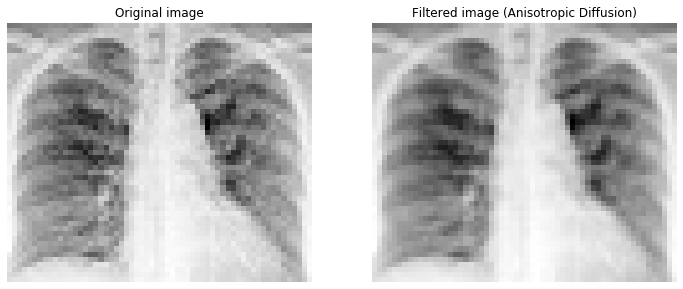

In [15]:
image_low_smooth = anisodiff(image_low,niter=1, plot_flag=True)

**Results**

Once **smooth filter** is applied it can be seen how image has **reduce** its **noise**. However, one of the problems is that the **bad resolution/low quality of the image** does not allow the correct performance of Perona-Malik filter. There is **no distinction between edges and interior parts** of the image so **noise is reduced in almost all the image**. Probably, this will cause some kind of problem in the application of watershed algorithm. 


The reduction of noise with Perona-Malik **could work better** and be better obseved in an **image with a better contrast and resolution** but as explained, segmentation needs to be also tested with low resolution image.

## Watershed segmentation algorithm

Once we plot the original and the smooth images, it is necessary to **apply Watershed algorithm** to both of them in order to compare which results are the best. Besides, the practice is based on the **segmentation of two anatomical structures**.


**First step** of the algorithm is the application of a **derivative filter** in order **to enhance the borders**. In this implementation a Sobel edge operator is used in place of the morphological gradient to extract edge strength. Thanks to this process, an edge image is created. The edge image has high values (white values) for the pixels with strong edges while it has low values (black values) for pixels that do not take part of edges. 


There are two different ways to continue once sobel image is created:

**a) The segmentation proceeds directly with the watershed operation.**

Once Sobel/gradient image is created, it can be applied to the watershed operation directly. However, **result** will be much **worse** as local minima are not being defined and image is going to be full of local minima. So, probably there is going to be an over-segmentation.

**b) The segmentation proceeds indirectly by applying the imimposemin function and then applying the watershed operation.**

The **imimposemin function** requires **selection** of at least **one marker (“seed” point) interior** to each object of the image, including the **background as a separate object**. The markers are chosen by ginput function. **In our case**, the **seeds selected have been 2** because it has been proved that **best results** are achieved with this choice. Once the objects are marked, they can be grown using a morphological watershed transformation (imimposemin).To understand this process, one can think of an image as a surface where the bright pixels represent mountaintops and the dark pixels valleys. The water will pour in each puncture and start to fill the valleys. However, the water from different punctures is not allowed to mix, and therefore the dams need to be built at the points of first contact. These dams are the boundaries of the water basins, and also the boundaries of image objects. So, **imimposemin funtion modifies the image** in such a way that it has a **minimum level of gray at the points considered, becoming local minima**. 

To work with this function, two images must be entered into the input:

- **Gradient/Sobel image** that we want to modify.

- **Binary mask image** of the same size as the gradient image, with the points where we want to impose the marked minimums. To get this image, you can use the ginput function.

### Application

#### 1. Watershed algorithm using original image (without smoothing).

##### Segmentation of high resolution  image

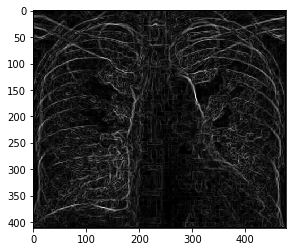

In [4]:
variables1 = WatershedExerciseP2(image_high, 2)

In [5]:
img = variables1[0]
sobel_norm = variables1[1]
minlocal_img = variables1[2]
watershed_img = variables1[3]
watershed_2_img = variables1[4]

The following plots represent all the steps that our algorithm follows: original image, sobel image, selection of seeds and result of the watershed segmentation (with local minima selected or without selecting local minima).

(Text(0.5, 1.0, 'Points selected'), (-0.5, 476.5, 410.5, -0.5))

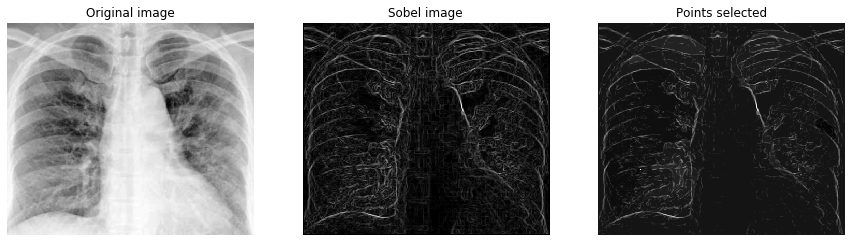

In [6]:
plt.figure(figsize=(15,7))


plt.subplot(1,3,1)
plt.imshow(img, cmap ="gray")
plt.title("Original image"), plt.axis('off')



plt.subplot(1,3,2)
plt.imshow(sobel_norm, cmap ="gray")
plt.title("Sobel image"), plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(minlocal_img, cmap ="gray")
plt.title("Points selected"), plt.axis('off')

Text(0.5, 1.0, 'Watershed image (without local minimum)')

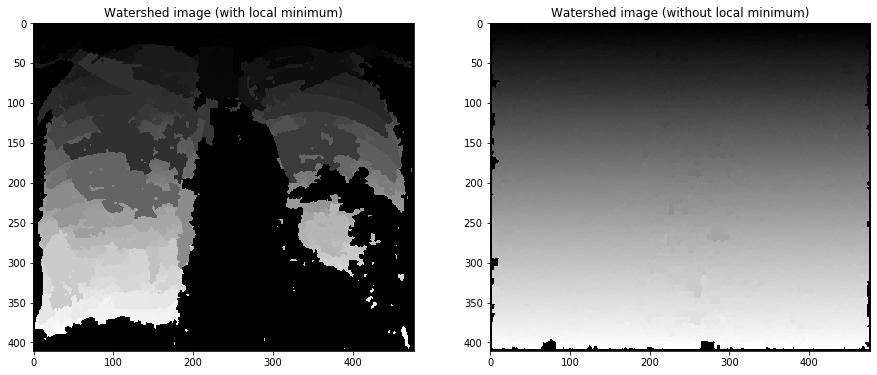

In [8]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.imshow(watershed_img, cmap ="gray")
plt.title("Watershed image (with local minimum)")

plt.subplot(1,2,2)
plt.imshow(watershed_2_img, cmap ="gray")
plt.title("Watershed image (without local minimum)")

**Results**

In this part, **segmentation of lungs** in a high resolution image is performed.

The plot of all the steps is going to help us to understand the procedure: 

- **Original image**: High resolution image. Smooth filter is not applied in this case because there is no noise to reduce.
- **Sobel image**: White parts corresponds to strong edges parts of image while black parts represent pixels that do not belong to edges.
- **Points selected**: This picture is the result of the imimposemin function. It can be seen how binary mask is applied to sobel image. 
- **Watershed image with application of local minimum**: It is the final result of segmenting lungs. As imimposemin funtion as been applied, points that are going to act as local minima have been selected. The result has been an accurate segmentation.
- **Watershed image without application of local minimum**: This is the final result of sementing lungs. In this case, local minima have not been established, so the local minimums have been established in all the image. This produces a very bad segmentation.

##### Segmentation  of low resolution image:

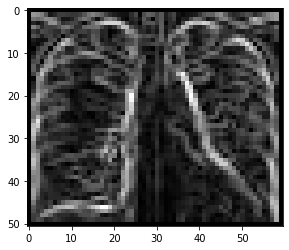

In [9]:
variables2 = WatershedExerciseP2(image_low, 2)

In [10]:
img2 = variables2[0]
sobel2_norm = variables2[1]
minlocal2_img = variables2[2]
watershed2_img = variables2[3]
watershed2_2_img = variables2[4]

The following plots represent all the steps that our algorithm follows: original image, sobel image, selection of seeds and result of the watershed segmentation (with localminima selected or without selecting local minima).

(Text(0.5, 1.0, 'Points selected'), (-0.5, 59.5, 50.5, -0.5))

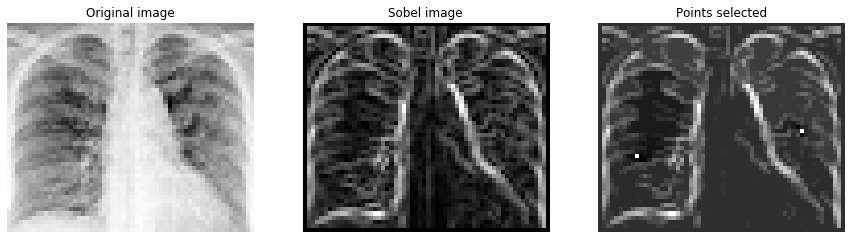

In [12]:
plt.figure(figsize=(15,7))


plt.subplot(1,3,1)
plt.imshow(img2, cmap ="gray")
plt.title("Original image"),plt.axis('off')



plt.subplot(1,3,2)
plt.imshow(sobel2_norm, cmap ="gray")
plt.title("Sobel image"),plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(minlocal2_img, cmap ="gray")
plt.title("Points selected"),plt.axis('off')

(Text(0.5, 1.0, 'Watershed image (without local minimum)'),
 (-0.5, 59.5, 50.5, -0.5))

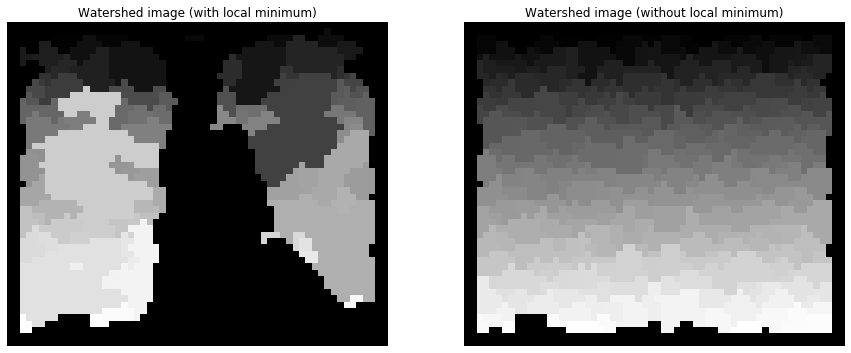

In [13]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.imshow(watershed2_img, cmap ="gray")
plt.title("Watershed image (with local minimum)"),plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(watershed2_2_img, cmap ="gray")
plt.title("Watershed image (without local minimum)"),plt.axis('off')

**Results**

In this part, **segmentation of lungs** in low resolution image is performed.

The plot of all the steps is going to help us to understand the procedure: 

- **Original image**: Low resolution image. Smooth filter is not applied in this case because a example without filtering is needed in order to, posteriorly, compare with filtered image.
- **Sobel image**: White parts corresponds to strong edges parts of image while black parts represent pixels that do not belong to edges.
- **Points selected**: This picture is the result of the imimposemin function. It can be seen how binary mask is applied to sobel image. Besides, white points represent the points selected to become seeds / local minimums.
- **Watershed image with application of local minimum**: It is the final result of segmenting lungs. As imimposemin funtion as been applied, points that are going to act as local minima have been selected. The result has been a accurate segmentation.
- **Watershed image without application of local minimum**: This is the final result of sementing lungs. In this case, local minima have not been establish, so the local minimums have been establish in all the image. This produces a very bad segmentation.

#### 2. Watershed algorithm using smooth bad resolution image to avoid oversegmentation.

When creating a bad resolution image some random noise is introduced. This noise can produce over-segmentation when applying watershed algorithm. For that reason, in some cases, a smooth filter is applied previous to the segmentation in order to reduce noise.

In this part of project is going to be checked if our images segmentation improves when applying smooth filter.

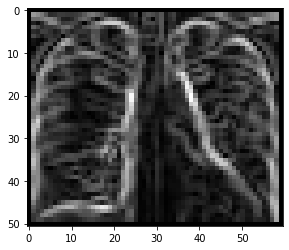

In [16]:
variables3 = WatershedExerciseP2(image_low_smooth, 2)

In [17]:
img3 = variables3[0]
sobel3_norm = variables3[1]
minlocal3_img = variables3[2]
watershed3_img = variables3[3]
watershed2_3_img = variables3[4]

The following plots represent all the steps that our algorithm follows: original image, sobel image, selection of seeds and result of the watershed segmentation (with localminima selected or without selecting local minima).

(Text(0.5, 1.0, 'Points selected'), (-0.5, 59.5, 50.5, -0.5))

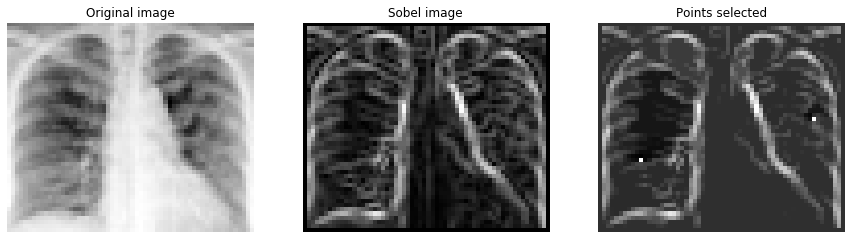

In [19]:
plt.figure(figsize=(15,7))


plt.subplot(1,3,1)
plt.imshow(img3, cmap ="gray")
plt.title("Original image"),plt.axis('off')



plt.subplot(1,3,2)
plt.imshow(sobel3_norm, cmap ="gray")
plt.title("Sobel image"),plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(minlocal3_img, cmap ="gray")
plt.title("Points selected"),plt.axis('off')


(Text(0.5, 1.0, 'Watershed image (without local minimum)'),
 (-0.5, 59.5, 50.5, -0.5))

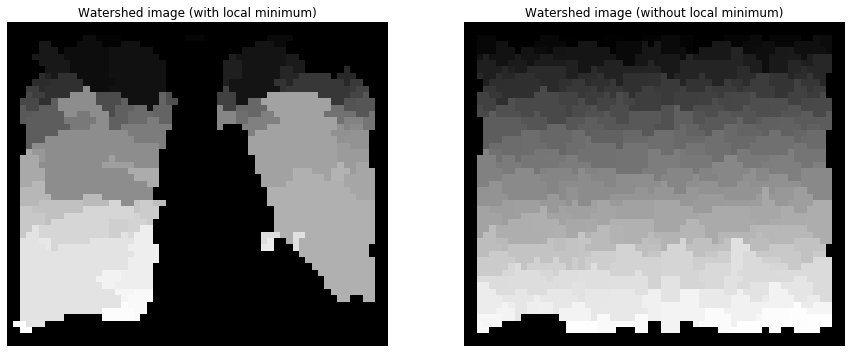

In [20]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.imshow(watershed3_img, cmap ="gray")
plt.title("Watershed image (with local minimum)"),plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(watershed2_3_img, cmap ="gray")
plt.title("Watershed image (without local minimum)"),plt.axis('off')

**Results**

In this part, **segmentation of lungs** in the low resolution filtered image is performed.

The plot of all the steps is going to help us to understand the procedure: 

- **Original image**: Low resolution image with Smooth filter applied in order to reduce noise.
- **Sobel image**: White parts corresponds to strong edges parts of image while black parts represent pixels that do not belong to edges. Sobel image is quite similar to the sobel in original low resolution image because contrast has not improved so edges are not better defined.
- **Points selected**: This picture is the result of the imimposemin function. It can be seen how binary mask is applied to sobel image. Besides, white points represent the points selected to become seeds.
- **Watershed image with application of local minimum**: It is the final result of segmenting lungs. As imimposemin funtion has been applied, points that are going to act as local minima have been selected. It is a better segmentation that the segmentation without local minima. However, it can be seen how the application of smooth filter is not useful because it does not segment better. One of the reason is that as original low resolution image had bad resolution/contrast, when smooth filter is applied it acts in all the image and it does not distinguish really accurate edges or not edges. So, watershed segments parts that do not belong to the lungs.
- **Watershed image without application of local minimum**: This is the final result of segmenting lungs. In this case, local minima have not been establish, so the local minimums have been establish in all the image. This produces a very bad segmentation. In this case, application of smooth filter has not any improvement or degrade.

## Conclusions

It can be seen how in the previous part, two anatomical structures (lungs) have been segmented. Now, a better visualization is going to be done to perform a better comparison and explanation of the results.

- Original high resolution image segmentation:

(Text(0.5, 1.0, 'Sobel VS Watershed image (no imimposemin)'),
 (-0.5, 476.5, 410.5, -0.5))

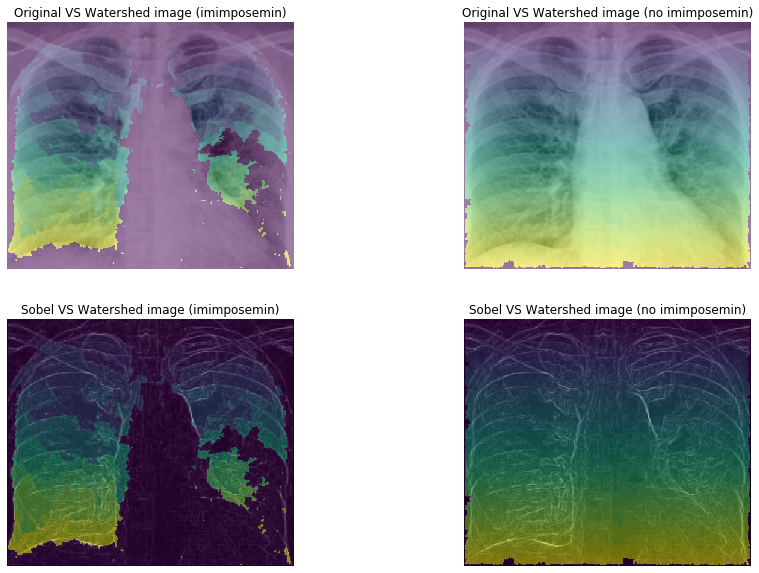

In [23]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.imshow(image_high, cmap ="gray")
plt.imshow(watershed_img, alpha=0.5)
plt.title("Original VS Watershed image (imimposemin)"),plt.axis('off')



plt.subplot(2,2,2)
plt.imshow(image_high, cmap ="gray")
plt.imshow(watershed_2_img, alpha=0.5)
plt.title("Original VS Watershed image (no imimposemin)"),plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(sobel_norm, cmap ="gray")
plt.imshow(watershed_img, alpha=0.5)
plt.title("Sobel VS Watershed image (imimposemin)"),plt.axis('off')



plt.subplot(2,2,4)
plt.imshow(sobel_norm, cmap ="gray")
plt.imshow(watershed_2_img, alpha=0.5)
plt.title("Sobel VS Watershed image (no imimposemin)"),plt.axis('off')

- Original low resolution image segmentation without smoothing:

(Text(0.5, 1.0, 'Sobel VS Watershed image (no imimposemin)'),
 (-0.5, 59.5, 50.5, -0.5))

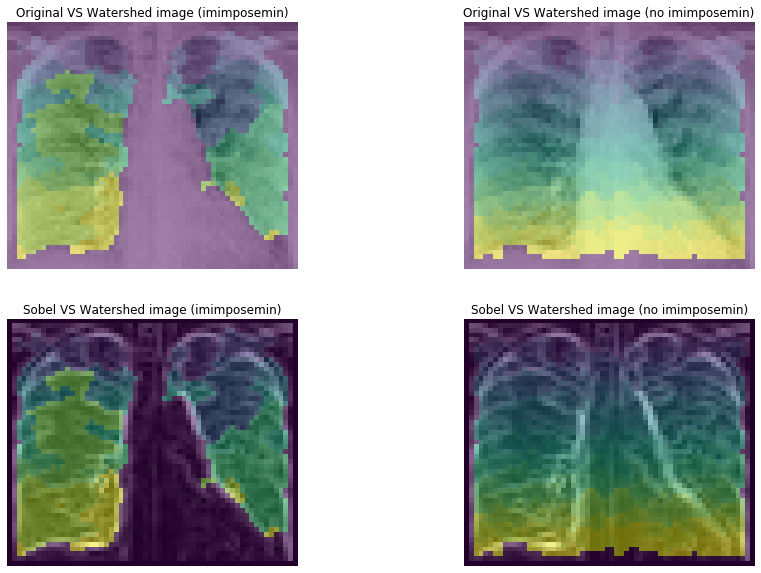

In [24]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.imshow(image_low, cmap ="gray")
plt.imshow(watershed2_img, alpha=0.5)
plt.title("Original VS Watershed image (imimposemin)"),plt.axis('off')



plt.subplot(2,2,2)
plt.imshow(image_low, cmap ="gray")
plt.imshow(watershed2_2_img, alpha=0.5)
plt.title("Original VS Watershed image (no imimposemin)"),plt.axis('off')


plt.subplot(2,2,3)
plt.imshow(sobel2_norm, cmap ="gray")
plt.imshow(watershed2_img, alpha=0.5)
plt.title("Sobel VS Watershed image (imimposemin)"),plt.axis('off')



plt.subplot(2,2,4)
plt.imshow(sobel2_norm, cmap ="gray")
plt.imshow(watershed2_2_img, alpha=0.5)
plt.title("Sobel VS Watershed image (no imimposemin)"),plt.axis('off')

- Filtered (Perona-Malik) low resolution image segmentation:

(Text(0.5, 1.0, 'Sobel VS Watershed image (no imimposemin)'),
 (-0.5, 59.5, 50.5, -0.5))

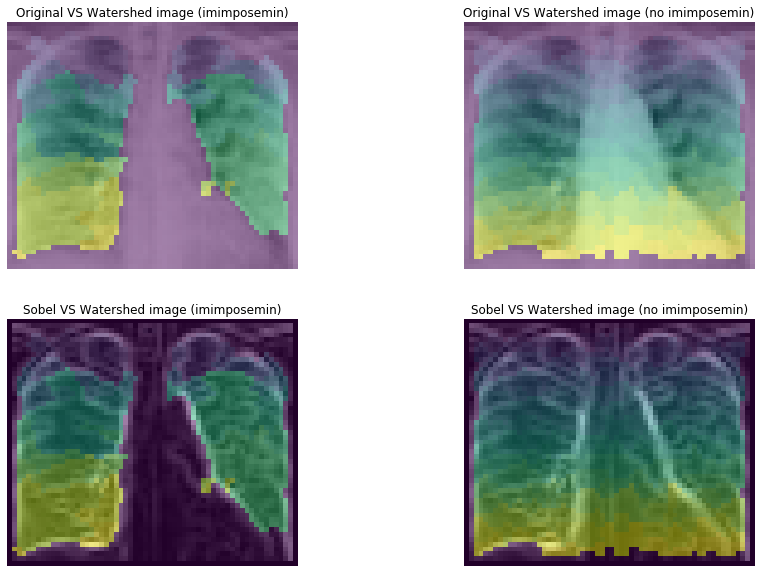

In [25]:
plt.figure(figsize=(15,10))


plt.subplot(2,2,1)
plt.imshow(image_low_smooth, cmap ="gray")
plt.imshow(watershed3_img, alpha=0.5)
plt.title("Original VS Watershed image (imimposemin)"), plt.axis('off')



plt.subplot(2,2,2)
plt.imshow(image_low_smooth, cmap ="gray")
plt.imshow(watershed2_3_img, alpha=0.5)
plt.title("Original VS Watershed image (no imimposemin)"), plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(sobel3_norm, cmap ="gray")
plt.imshow(watershed3_img, alpha=0.5)
plt.title("Sobel VS Watershed image (imimposemin)"), plt.axis('off')



plt.subplot(2,2,4)
plt.imshow(sobel3_norm, cmap ="gray")
plt.imshow(watershed2_3_img, alpha=0.5)
plt.title("Sobel VS Watershed image (no imimposemin)"), plt.axis('off')

**Results**

Due to the resulting graphics, it can be **concluded** that **low resolution images are better segmented than high resolution images**. One of the reasons could be that our original images have a lot of resolution but quite low contrast, this results in a poor sobel image. As watershed segmentation is applied on the Sobel image, if this one is not correct (edges are not enough differentiate from interior objects) segmentation will not be accurate. When reducing resolution, gradient image improves so final segmentation also improves.


Besides, another conclusion is that **Perona-Malik (smooth) filter is not useful in our low resolution image**. The reason is that initial low resolution image has a very low contrast. This makes very difficult the differentiation between edges and other parts. For this reason, when applying smooth filter, filter is not able to detect edges and interior parts. So it also smooth parts that should not be smooth. When introducing smooth image into the WaterShed algorithm, it can be seen how in the segmentation there are parts that algorithm has take as lungs that are not actually lungs.

To conclude, it is **better to use our low resolution original image without applying any filter previously**.

Conclusion regarding utilization of imimposemin function is clear. It is **necessary to select local minima** in order to segment. If not, local minima are going to be generated in all the image and there is going to be a horrible segmentation. Moreover, in our case, the **selection of only 2 seeds is enough**, because it is able to perfectly segment lungs.

## Questions

Discuss the results obtained on a Jupyter Notebook and answer the following questions:

**• Comment on the characteristics of the masks, both at the level of elements stored in the matrix,
and graphically on the gradient image. What does each color level represent in the masks?**

Image segmentation studied is the segmentation of low resolution image.

In [26]:
print(watershed2_img) # Watershed segmentation mask using local minima.

[[ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 ...
 [ 1  1 92 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]]


Text(0.5, 1.0, 'Original VS Watershed image (imimposemin)')

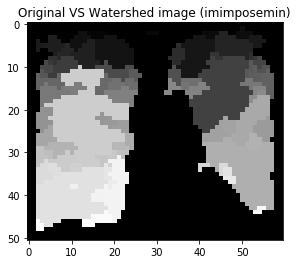

In [27]:
plt.imshow(watershed2_img, cmap ="gray")
plt.title("Original VS Watershed image (imimposemin)")

In [28]:
print(watershed2_2_img) # Watershed segmentation mask without using local minima.

[[  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 [  1   1   9 ...  15   1   1]
 ...
 [  1   1 308 ... 312   1   1]
 [  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]]


Text(0.5, 1.0, 'Original VS Watershed image (no imimposemin)')

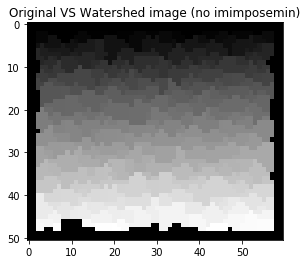

In [29]:
plt.imshow(watershed2_2_img, cmap ="gray")
plt.title("Original VS Watershed image (no imimposemin)")

Analyzing the matrix and images obtained, it can be concluded:

**Watershed segmentation using imimposemin function** generates a matrix in which  1's represent the background object (black) and other numbers different than 1 represent the different parts of lungs that have been segmented. As it can be seen in the plotted image, upper part of lungs obtains lower values than lower parts. This is produced because gray intensities of pixels inside lungs varies depending on the different parts.

**Watershed segmentation without using imimposemin function** does not achieve a proper segmentation. For this reason, it generates a matrix in which the upper part corresponds to black values (1's) and the lower part of image to the highest values. However, it can be appreciated that there are not anatomical structures segmented.

(Text(0.5, 1.0, 'Sobel VS Watershed image (no imimposemin)'),
 (-0.5, 59.5, 50.5, -0.5))

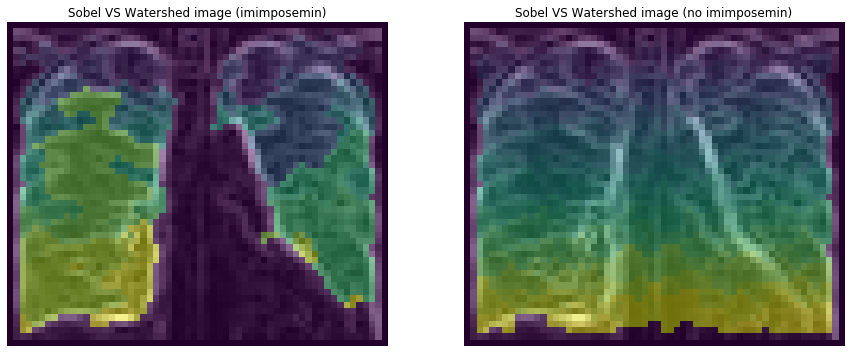

In [31]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,3)
plt.imshow(sobel2_norm, cmap ="gray")
plt.imshow(watershed2_img, alpha=0.5)
plt.title("Sobel VS Watershed image (imimposemin)"),plt.axis('off')



plt.subplot(2,2,4)
plt.imshow(sobel2_norm, cmap ="gray")
plt.imshow(watershed2_2_img, alpha=0.5)
plt.title("Sobel VS Watershed image (no imimposemin)"),plt.axis('off')

Analyzing these colorful images, background gray image is the gradient image, while colors in the foreground are the different segmented structures depending on the two different mask obtained. 


**Watershed segmentation using imimposemin function** generates a really good segmentation. Previously, it has been explained that the selected parts to segment have been lungs, in this images it can be completly observed a difference between background (purple) and lungs (other colors). Besides, inside lungs there are different segmented parts that are defined by blue, green and yellow color. These three colors are three different segmentations inside lungs due to the different intensity values inside lungs.

**Watershed segmentation without using imimposemin function** does not achieve any segmentation. This can be perfectly seen in our colorful images, where the segmentation colous are dispersed by all the picture not only lungs.

**• Discuss the differences between the two masks. Explain the reason for the gradient obtained in the
representation of the seedless mask, and what we achieved when we introduced it.**

There are big differences between Watershed mask with imimposemin function (seed mask) and Watershed mask without it (seedless mask). 

When applying a binary mask into the gradient image the creation of a seed mask occurs. In this seed mask there is a selection of certain points (seeds) that are going to define the local minima of the image. Once these points are selected the watersheed algoritm is applied taking as reference these points. In this case, the image would act as a valley in which local minima points will be 'cover by water' while edges or local maxima points not. These dams will produce a segmentation between areas. Segmentation with this method is much better, it does not introduce oversegmentation. 


However, if the method we apply is Watershed without seeds the final segmentation will be much more worse. This occurs because in this case, image contains several random local minima and a oversegmentation is produced because watershed will take all these points as reference points. As it can be seen in our images, this theory coincide with our results. Segmentation of lungs is not achieved and the resulting segmantation englobles all the image not only lungs. 

**• Explain why we used the gradient image at the input of the watershed, and not the original image.**

Input parameter to Watershed algorithm can be the Sobel/Gradient image directly or the image resulting from imimposemin funtion. These input parameters are used instead of the original image because it is needed to enhance borders of the image and extract edge strength. It is necessary because as explained before, this algorithm performs based on valleys (pixels that do not take part of edges) and edges (pixels with high values that belong to the edges of the object).

If the original image is introduced, probably, algorithm did not segment properly the anatomical structures. In our case, if gradient/Sobel image is directly apply algorithm does not work properly neither because image has very low resolution and contrast.

So the best option is to use imimposemin funtion that introduce a binary mask into the gradient/sobel image with the aim of obtaining local minima and compute a better algoritm.

As it can be concluded from our images, previous explanation is correct. When applying sobel image into watershed function without applying imimposemin function, the segmentation is not properly done. Probably, if image had better contrast the result will be much more better.

**• Comment on the results obtained by introducing different numbers of seeds in different positions
of the image. Is there any other way to improve the quality of targeting?**


Project has been performed introducing 2 seeds to segmentate two different anatomical structures. The application of more seeds inside lungs could have been done; however, the best results were obtained while applying only 2 seeds (Probably because of the different intensities of gray inside the same lung). However, code is built in order to change this parameter and add more seeds if it is required. 

Besides, anatomical parts that are segmented are lungs because taking into account the quality of our image is the option with the best results. This conclusion has been reached once the segmentation of heart was tried; however, as gray level of heart is equal to gray level of sternum or ribs, segmentation is not well performed.

Considering our images, there is not way to improve quality of targeting because one option was performing a smoothing filter before applying algorithm and it was useless. The only possible solution will be using an image with both, a better contrast and resolution.

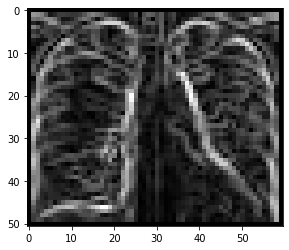

In [32]:
variables_heart = WatershedExerciseP2(image_low, 1)

In [33]:
img_heart = variables_heart[0]
sobel_norm_heart = variables_heart[1]
minlocal_img_heart = variables_heart[2]
watershed_img_heart = variables_heart[3]
watershed_2_img_heart = variables_heart[4]

(Text(0.5, 1.0, 'Points selected'), (-0.5, 59.5, 50.5, -0.5))

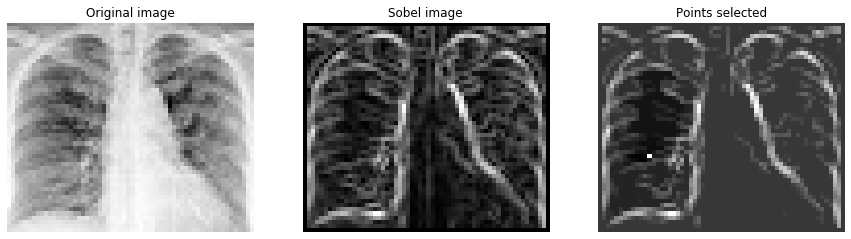

In [36]:
plt.figure(figsize=(15,7))


plt.subplot(1,3,1)
plt.imshow(img_heart, cmap ="gray")
plt.title("Original image"),plt.axis('off')



plt.subplot(1,3,2)
plt.imshow(sobel_norm_heart, cmap ="gray")
plt.title("Sobel image"),plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(minlocal_img_heart, cmap ="gray")
plt.title("Points selected"),plt.axis('off')

(Text(0.5, 1.0, 'Watershed image (without local minimum)'),
 (-0.5, 59.5, 50.5, -0.5))

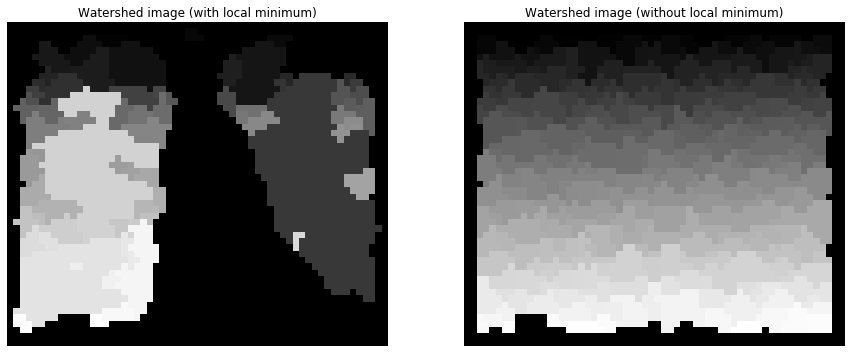

In [37]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(watershed_img_heart, cmap ="gray")
plt.title("Watershed image (with local minimum)"), plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(watershed_2_img_heart, cmap ="gray")
plt.title("Watershed image (without local minimum)"), plt.axis('off')

It is easly seen how heart is not well-segmented because its gray values are not properly differentiated from other structures such as bones.

## References

• Medical Image Analysis slides: Chapter 4.2 

• https://www.sciencedirect.com/topics/computer-science/watershed-segmentation

• https://en.wikipedia.org/wiki/Watershed_(image_processing)

• https://www.lpi.tel.uva.es/muitic/pim/docus/anisotropic_diffusion.pdf

• https://www.researchgate.net/publication/220203882_A_diffusion_method_for_image_filtering_and_sharpening

• https://en.wikipedia.org/wiki/Anisotropic_diffusion

## Contribution

Code has been done by three of us in different periodic meetings in which code has been created, improved, checked and modified. Regarding explanation of code and the creation of notebook Lucia is the person in charge of it.